In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import h5py
import PIL

In [2]:
#from data.convert_distance_to_depth import * 
import sys  
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/../")

#sys.path.insert(0, '../../data/')

from loaddata import *

In [12]:
#test_dataframe = pd.read_csv("../../data/downloads/image_file_test.csv")
dataframe = pd.read_csv("../../data/downloads/image_files.csv")
number_of_samples = dataframe.shape[0];
print(number_of_samples)

1880


In [13]:
############################ careful ####################### 
import csv 
test_file_name = open(os.path.join("../../data/downloads/", "image_file_visualize.csv"), "w", newline="")
writer = csv.writer(test_file_name)

writer.writerow(["Depth", "Segmentation", "ToneMapped"])
 
for i in range(0, number_of_samples, 100):
    #print(dataframe.iloc[i])
    writer.writerow(dataframe.iloc[i].to_list())

In [14]:
csv_file_name = "../../data/downloads/image_file_visualize.csv"

In [16]:
test_dataframe = pd.read_csv(csv_file_name)
number_of_samples = test_dataframe.shape[0];
print(number_of_samples)

16


In [6]:
test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=None)


In [18]:
test_depth_image_name = test_dataframe["Depth"][0]
test_depth_image = h5py.File(test_depth_image_name, "r", )["dataset"][()]

print(test_depth_image.max(axis=(0,1)))
print(test_depth_image.min(axis=(0,1)))

#test_color_image_name = test_dataframe["RGB"][0]
#test_color_image = h5py.File(test_color_image_name, "r")["dataset"][()] 

test_toned_color_image_name = test_dataframe["ToneMapped"][0]
test_toned_color_image = Image.open(test_toned_color_image_name, "r")

3.904
1.746


In [21]:
def display_image(data, remapping=None):
    np_data = np.array(data)
    if remapping != None: 
        np_data = remapping(np_data)
    fig, (ax) = plt.subplots(1)
    pcm = ax.imshow(np_data)
    fig.colorbar(pcm, ax=ax)    
    plt.show()
    

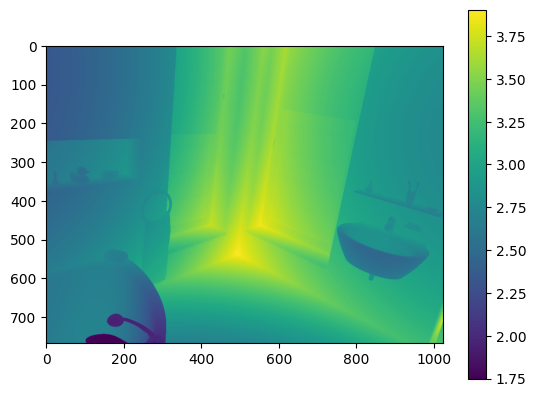

In [22]:
### distance to camera center
display_image(test_depth_image)

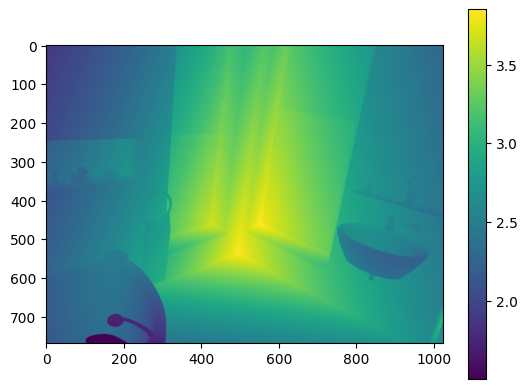

In [23]:
#### planar depth values
from data.convert_distance_to_depth import * 
    
display_image(test_depth_image, convert_distance_to_depth)

In [25]:
def remap_data(np_array,wanted_max=255):
    return (np_array/np_array.max(axis=(0,1))*wanted_max).astype(np.uint8)

0.05353
8.3
1
255


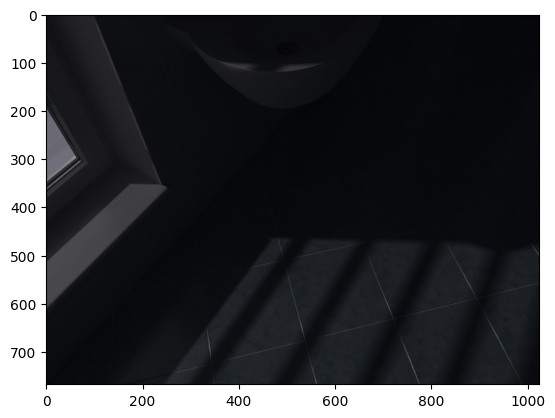

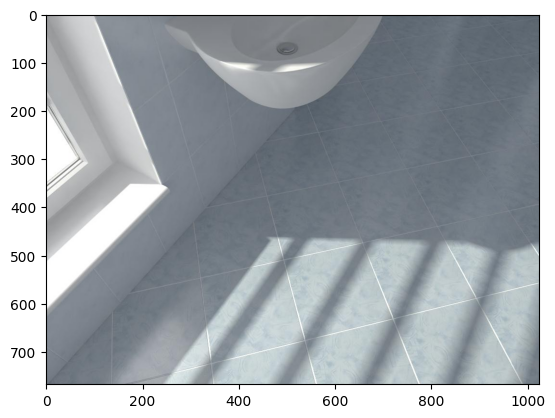

In [9]:
###### compare toned and raw images ########## 
display_image(test_color_image, remap_data)
display_image(test_toned_color_image)

(768, 1024, 3)
(240, 320, 3)


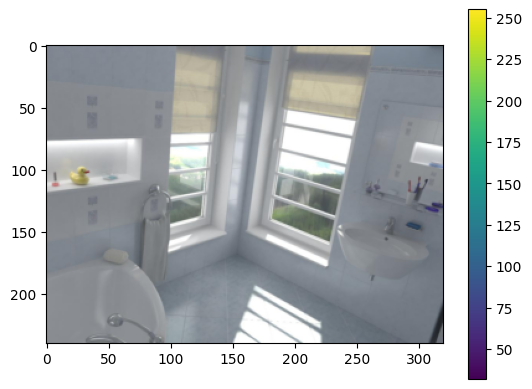

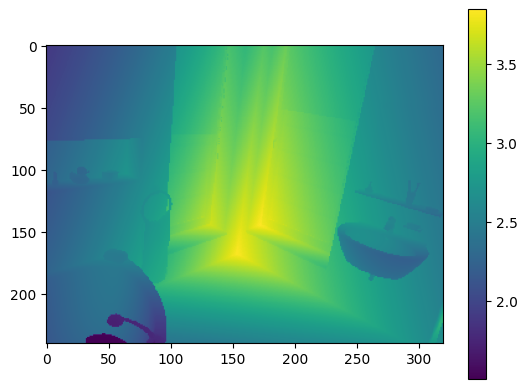

In [26]:
### check data transformation ####### 
test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240)]))

test_sample = test_dataset.__getitem__(0); 

print(np.array(test_toned_color_image).shape)
print(np.array(test_sample["image"]).shape)

display_image(test_sample["image"])

display_image(test_sample["depth"])


(768, 1024, 3)
(228, 304, 3)


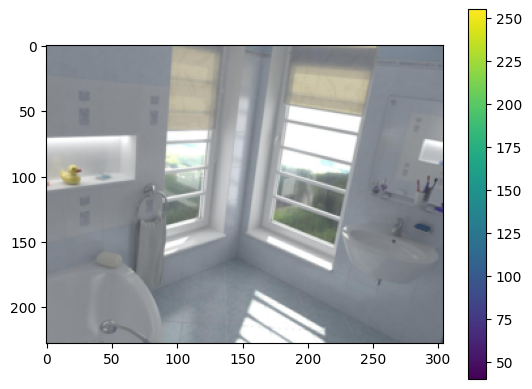

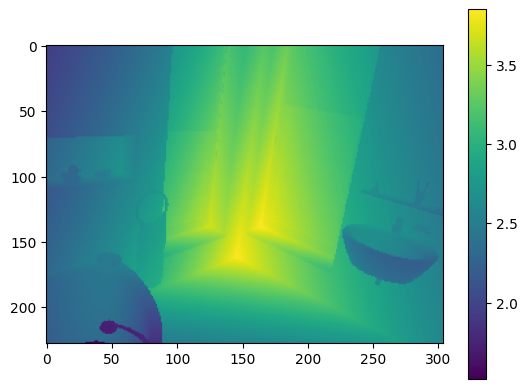

In [27]:
### check data transformation ####### 
test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228])]))

test_sample = test_dataset.__getitem__(0); 

print(np.array(test_toned_color_image).shape)
print(np.array(test_sample["image"]).shape)

display_image(test_sample["image"])

display_image(test_sample["depth"])


In [28]:
def display_tensor_data(tensor):
    fig, (ax) = plt.subplots(1)
    pcm = ax.imshow(tensor.permute(1,2,0))
    fig.colorbar(pcm, ax=ax)    
    plt.show()

torch.Size([3, 228, 304])


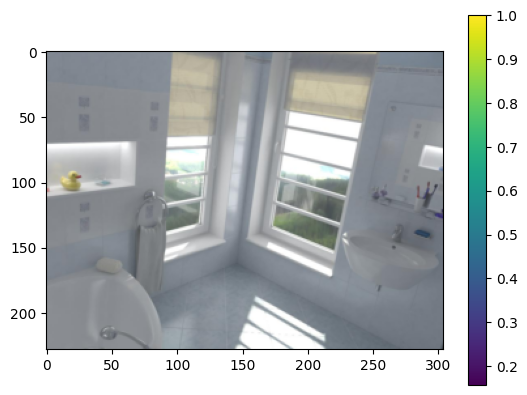

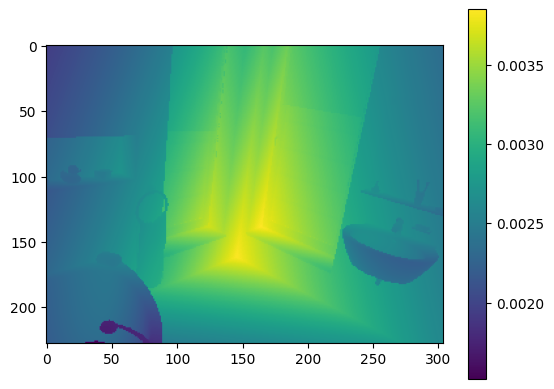

In [29]:
#### check data transformation ####### 

mean, std = get_dataset_stats(csv_filename=csv_file_name)

test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228]), ToTensor(is_test=True)]))

test_sample = test_dataset.__getitem__(0); 

print(test_sample["image"].shape)

display_tensor_data(test_sample["image"])

display_tensor_data(test_sample["depth"])

In [30]:
    def normalize(tensor, mean, std):
        """Normalize a tensor image with mean and standard deviation.
        See ``Normalize`` for more details.
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
            mean (sequence): Sequence of means for R, G, B channels respecitvely.
            std (sequence): Sequence of standard deviations for R, G, B channels
                respecitvely.
        Returns:
            Tensor: Normalized image.
        """

        # TODO: make efficient
        for t, m, s in zip(tensor, mean, std):
            print(t.min())
            print(t.max())
            t.sub_(m).div_(s)
            print(t.min())
            print(t.max())
            
            
        return tensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.64717275 0.49108199 0.48054518]
[0.20830748 0.2462041  0.25340463]
torch.float32
tensor(0.1569)
tensor(1.)
tensor(-2.3538)
tensor(1.6938)
tensor(0.1804)
tensor(1.)
tensor(-1.2619)
tensor(2.0671)
tensor(0.1843)
tensor(1.)
tensor(-1.1690)
tensor(2.0499)
torch.Size([3, 228, 304])


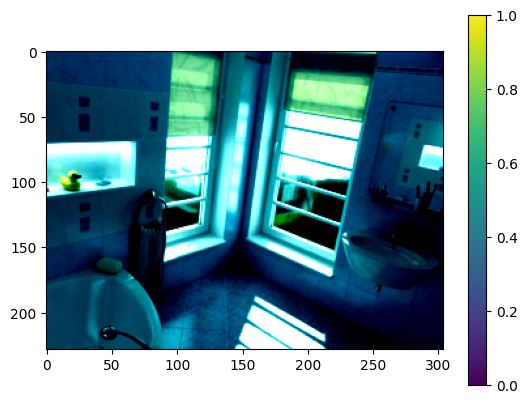

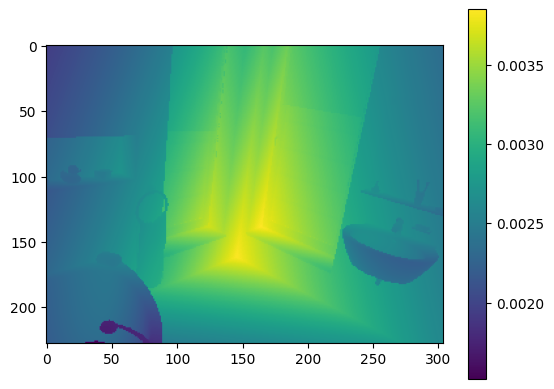

In [31]:
### check data transformation ####### 

mean, std = get_dataset_stats(csv_filename=csv_file_name)

test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228]), ToTensor(is_test=True)]))

test_sample = test_dataset.__getitem__(0)

print(test_sample["image"].dtype)

normalized_color_image = normalize(test_sample["image"], mean, std)

print(test_sample["image"].shape)

display_tensor_data(normalized_color_image)

display_tensor_data(test_sample["depth"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.64717275 0.49108199 0.48054518]
[0.20830748 0.2462041  0.25340463]


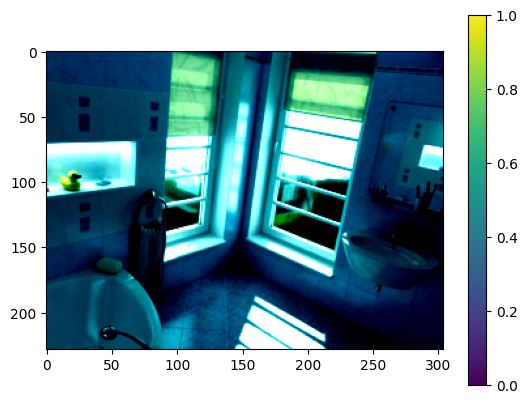

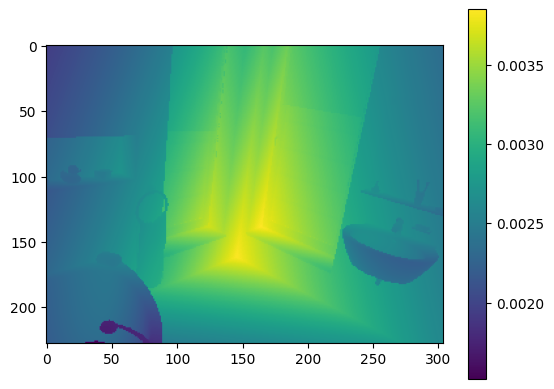

In [32]:
### check data transformation ####### 

mean, std = get_dataset_stats(csv_filename=csv_file_name)

print(mean)

print(std)

test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228]), ToTensor(is_test=True), Normalize(mean, std)]))

test_sample = test_dataset.__getitem__(0)

display_tensor_data(test_sample["image"])

display_tensor_data(test_sample["depth"])

In [33]:
########## check edge detection ############# 
from test import *

torch.Size([1, 1, 228, 304])


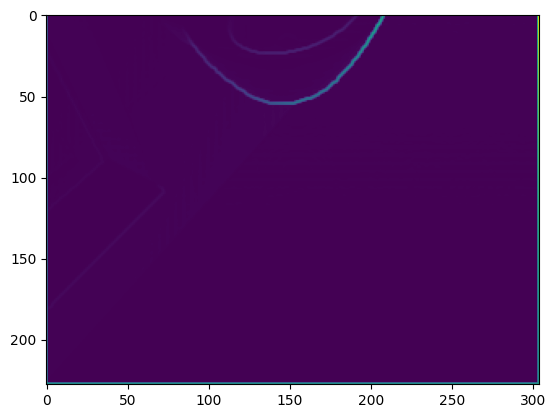

tensor(False)
tensor(False)


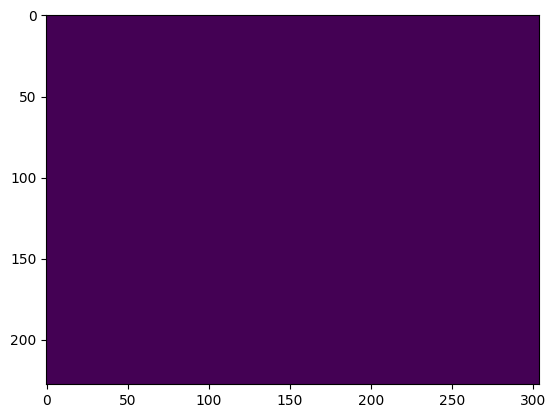

In [30]:
print(test_sample["depth"][None,:].shape) 
depth_edge = edge_detection(test_sample["depth"][None, :]) #additional dimension due to batch 
display_tensor_data(depth_edge)

thre = 0.25
edge_valid = (depth_edge > thre)

print(edge_valid.min())
print(edge_valid.max())

display_tensor_data(edge_valid)

In [34]:
model = define_model(is_resnet=False, is_densenet=False, is_senet=True)
model = torch.nn.DataParallel(model) #.cuda()
model.load_state_dict(torch.load('./pretrained_model/model_senet', map_location=torch.device('cpu')))

<All keys matched successfully>

In [35]:
def test_sample(model, test_loader): 
    model.eval()
    depth_results = []
    for i, sample_batched in enumerate(test_loader):
        image, depth = sample_batched['image'], sample_batched['depth']
        image = torch.autograd.Variable(image, requires_grad=False)
        depth = torch.autograd.Variable(depth, requires_grad=False)
        output = model(image)
        output = torch.nn.functional.interpolate(output, size=[depth.size(2),depth.size(3)], mode='bilinear')
        #display_tensor_data(output[0,:].detach())
        #display_tensor_data(depth[0,:])
        #plt.imshow(output[0,:].permute(1, 2, 0).detach().numpy())
        #plt.show()
        depth_results.append(output)
        
    return depth_results
    

In [ ]:
###### network output ########### 
test_loader = loaddata.getTestingData(1, csv_file_name)
depth_results = test_sample(model, test_loader)



/var/folders/y3/_mzy7j_s5kl99n8pj0pqwns40000gn/T/ipykernel_88639/1917144358.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = torch.autograd.Variable(image, volatile=True)
/var/folders/y3/_mzy7j_s5kl99n8pj0pqwns40000gn/T/ipykernel_88639/1917144358.py:7: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  depth = torch.autograd.Variable(depth, volatile=True)
/Users/alicemazzoleni/anaconda3/envs/3dVisionProject/lib/python3.9/site-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


0


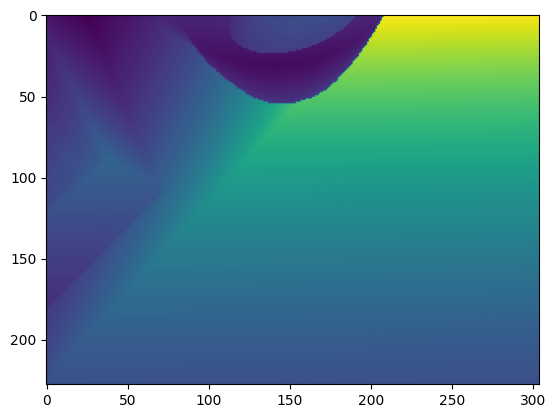

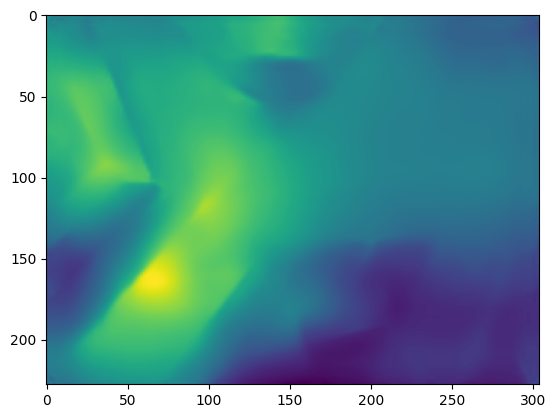

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


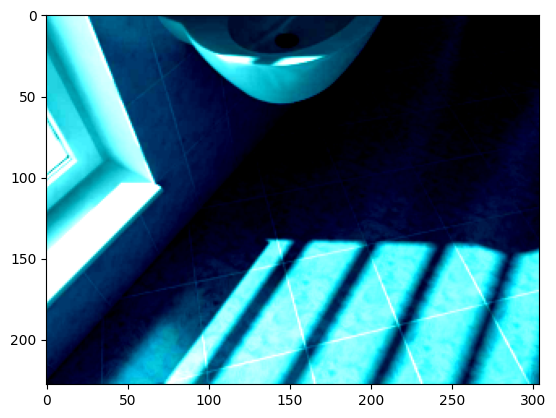

5


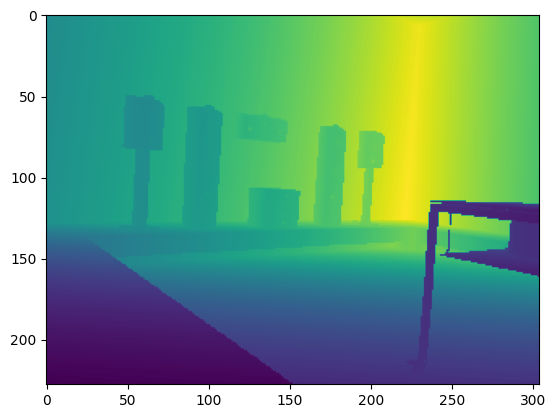

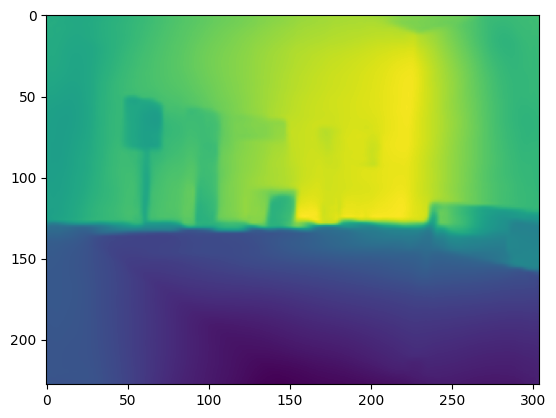

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


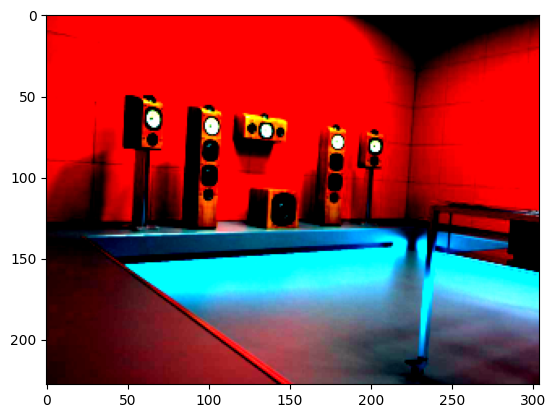

10


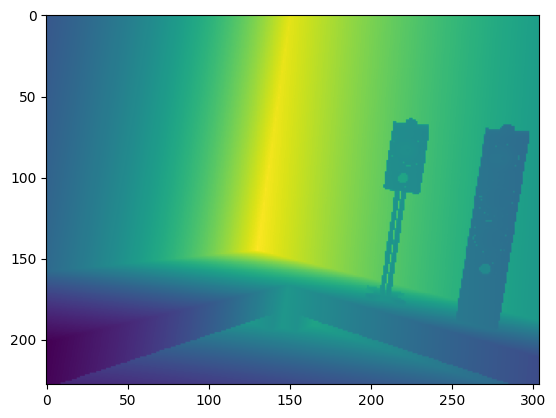

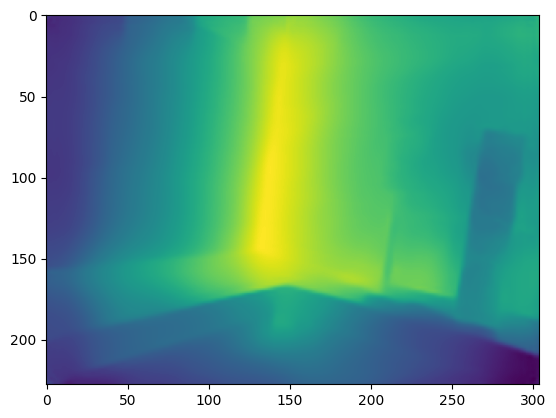

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


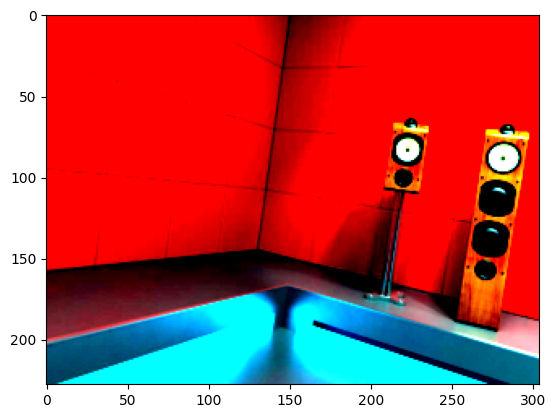

15


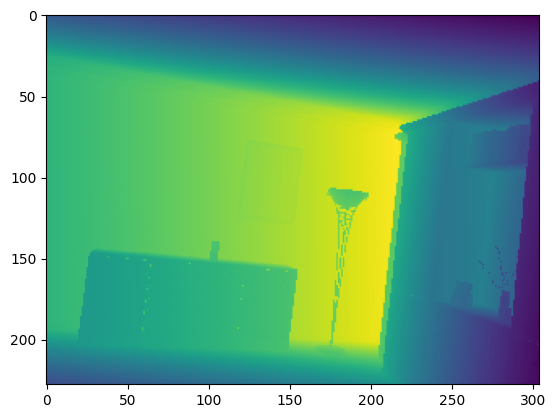

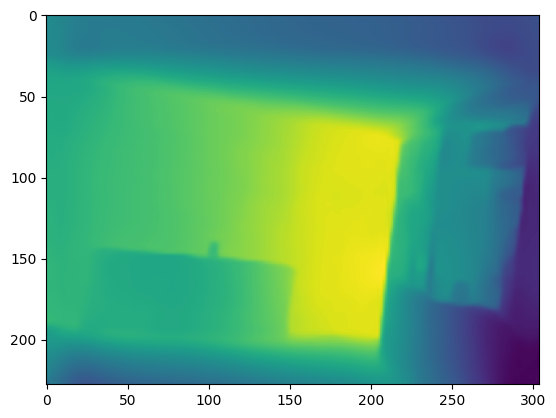

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


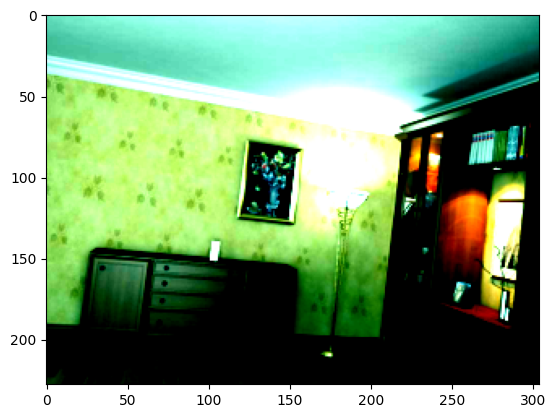

20


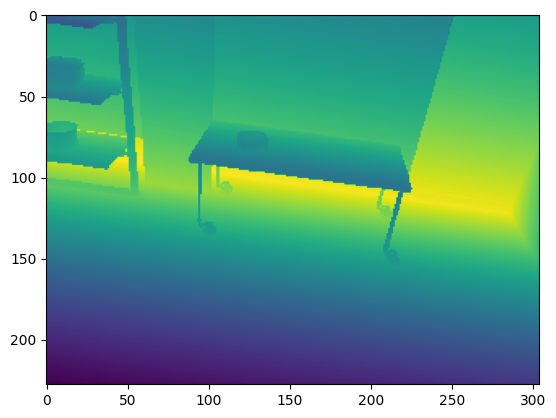

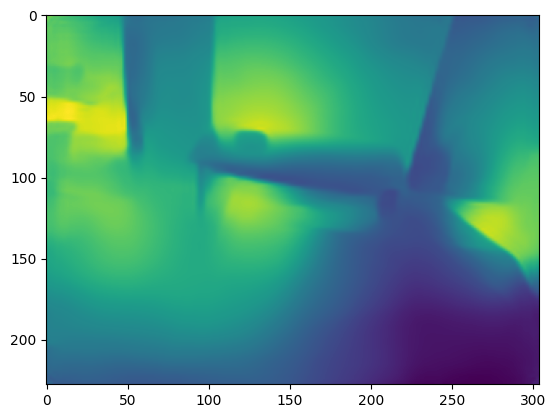

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


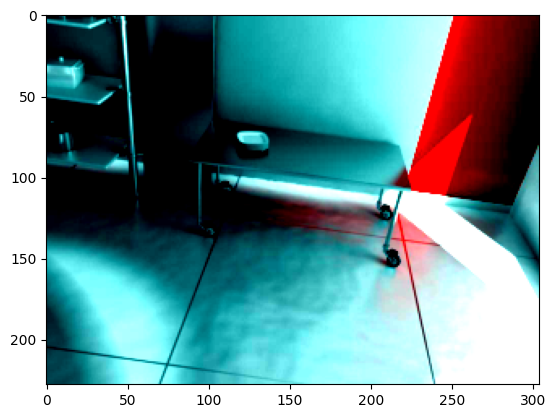

25


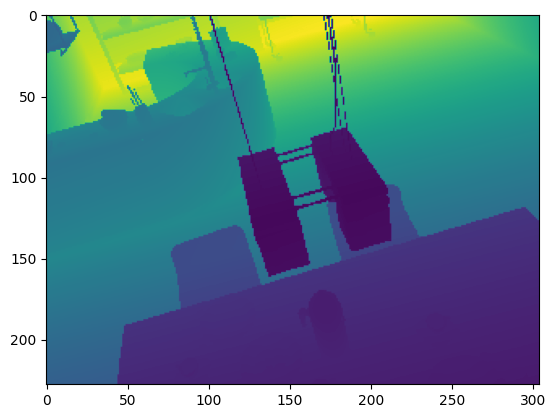

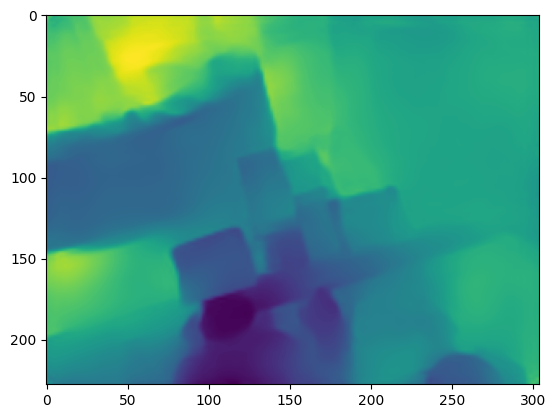

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


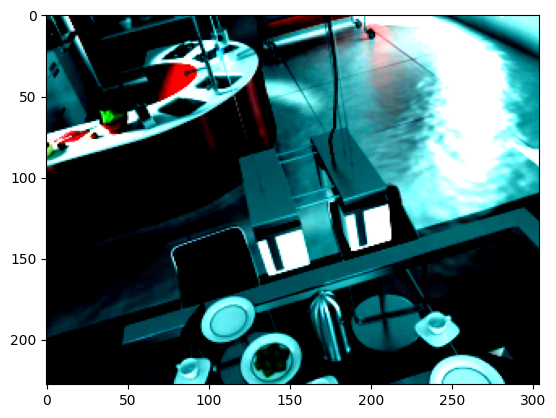

In [31]:
for i, sample_batched in enumerate(test_loader):
    if(i%5==0):
        print(i)
        display_tensor_data(sample_batched["depth"][0,:].detach())
        display_tensor_data(depth_results[i][0,:].detach())
        display_tensor_data(sample_batched["image"][0,:].detach())

tensor shape in display:  torch.Size([1, 228, 304])


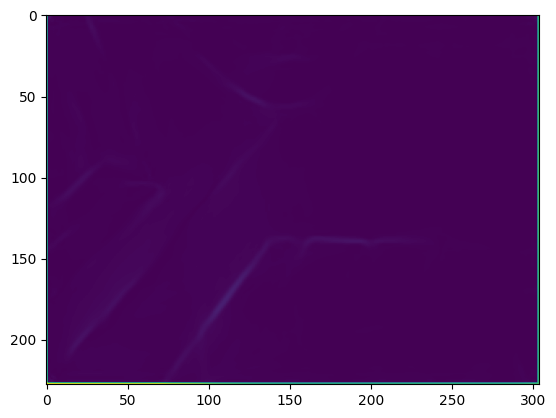

tensor shape in display:  torch.Size([1, 228, 304])


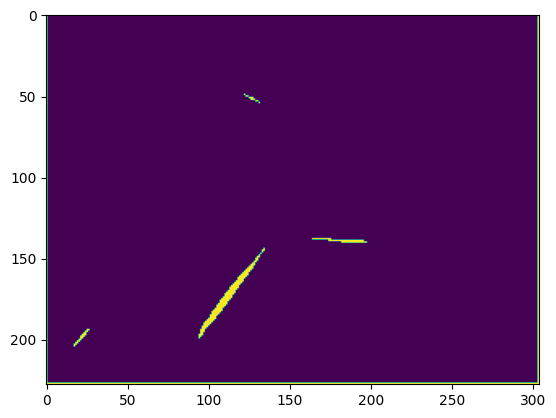

In [72]:
depth_edge = edge_detection(depth_results[0]) #additional dimension due to batch 
display_tensor_data(depth_edge.detach())

thre = 0.25
edge_valid = (depth_edge > thre)
display_tensor_data(edge_valid)